In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from datetime import datetime
from datetime import date
import calendar
import seaborn as sea

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48


In [5]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7
...,...,...,...,...,...,...,...,...,...,...,...
4394,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,11,108
4395,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,8,81
4396,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60.0,11.0014,7,83
4397,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56.0,8.9981,13,48


In [6]:
train.shape

(12980, 12)

In [7]:
test.shape

(4399, 11)

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [10]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [12]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# UNIVARIATE ANALYSIS

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

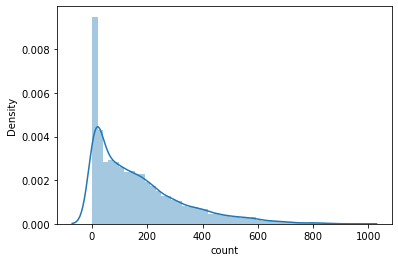

In [13]:
#OUR TARGET VARIABLE IS "count"
sea.distplot(train['count'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

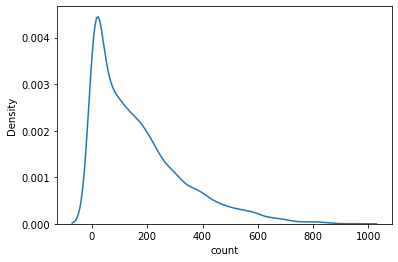

In [14]:
#FOR ONLY FREQUENCY POLYGON
sea.distplot(train['count'],hist=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count'>

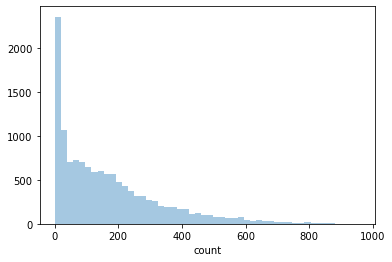

In [15]:
#FOR ONLY HISTOGRAM
sea.distplot(train['count'],kde=False)

<AxesSubplot:xlabel='count', ylabel='Density'>

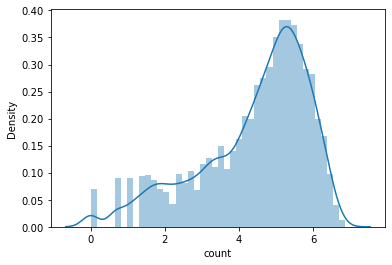

In [16]:
#The distribution is skewed towards right and hence we can take log of the variable and see if the distribution becomes normal.
sea.distplot(np.log(train['count']))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

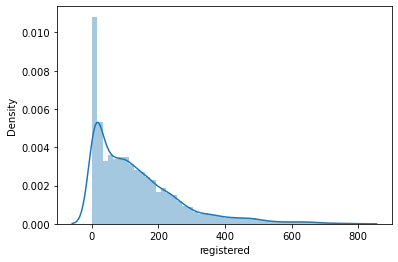

In [17]:
#Let's first look at the distribution of registered variable to check the number of registered user rentals initiated.
sea.distplot(train['registered'])

Text(0, 0.5, 'Frequency')

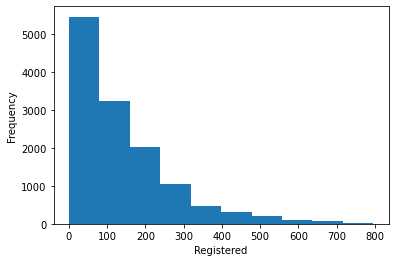

In [18]:
plt.hist(train['registered'],bins=10)
plt.xlabel("Registered")
plt.ylabel("Frequency")

#Let's now look at how correlated our numerical variables are.

We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable.

# BIVARIATE ANALYSIS

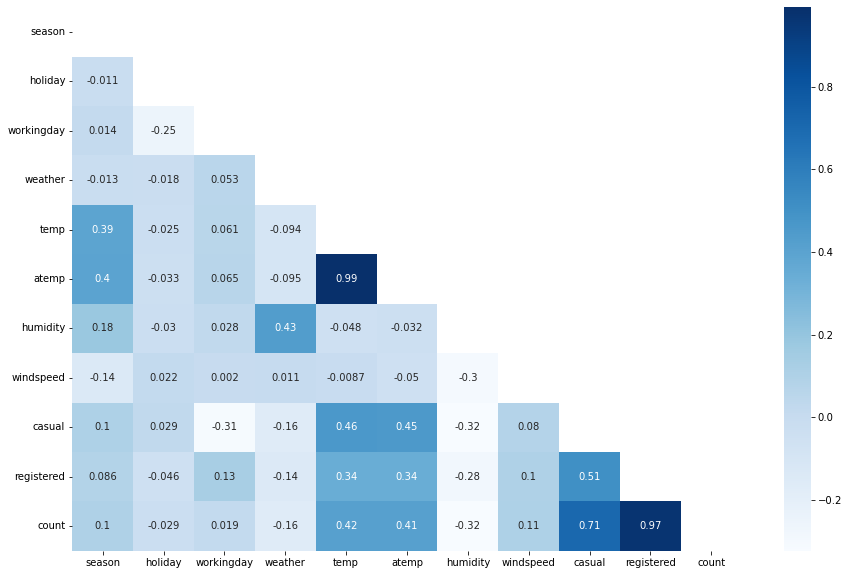

In [19]:
#FINDING CORRELATION OF THE NUMERIC VALUE 
data_numeric=train.select_dtypes(include=[np.number])
data=data_numeric.corr()
mask=np.zeros_like(data_numeric.corr())
tringle=np.triu_indices_from(mask)
mask[tringle]=True
plt.figure(figsize=(15,10))
heatmap=sea.heatmap(data,mask=mask,annot=True,cmap='Blues')

Some of the inferences from the above correlation map are:

temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".

windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

Since "atemp" and "temp" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

In [20]:
#LOOKING AT MISSING VALUES IN THE DATASET
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [21]:
#FOR TEST DATASET
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

extract some new features using the datetime variable. We can extract the date, hour, month.

In [22]:
#EXTRACTING DATE,HOUR AND MONTH FROM DATETIME
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['hour']=train.datetime.apply(lambda x:x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [23]:
#FOR TEST DATASET
test['date']=test.datetime.apply(lambda x : x.split()[0])
test['hour']=test.datetime.apply(lambda x : x.split()[1].split(":")[1])
test['month']=test.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set.

In [24]:
training=train[train['datetime']<="2012-03-30 0:00:00"]
validation=train[train["datetime"]>='2012-03-30 0:00:00']

In [25]:
training

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10769,2012-03-29 20:00:00,2,0,1,1,18.86,22.725,38.0,19.9995,34,301,335,2012-03-29,20,3
10770,2012-03-29 21:00:00,2,0,1,1,18.04,21.970,44.0,19.0012,10,214,224,2012-03-29,21,3
10771,2012-03-29 22:00:00,2,0,1,1,17.22,21.210,44.0,19.0012,17,135,152,2012-03-29,22,3
10772,2012-03-29 23:00:00,2,0,1,1,17.22,21.210,47.0,19.9995,17,77,94,2012-03-29,23,3


We will drop the datetime, date variable as we have already extracted features from these variables.
We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [26]:
train=train.drop(['datetime','atemp','date'],axis=1)
test=test.drop(['datetime','atemp','date'],axis=1)

In [27]:
training=training.drop(['datetime','atemp','date'],axis=1)
validation=validation.drop(['datetime','atemp','date'],axis=1)

# MODEL BUILDING

# LINEAR REGRESSION

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lreg = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [35]:
x_train=training.drop(['count'],1)
y_train=np.log(training['count'])
x_val=validation.drop(['count'],1)
y_val=np.log(validation['count'])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5580/3389967791.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train=training.drop(['count'],1)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5580/3389967791.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_val=validation.drop(['count'],1)


In [36]:
x_train.shape

(10774, 11)

In [37]:
y_train.shape

(10774,)

In [38]:
#FITTING THE MODEL
lreg.fit(x_train,y_train)

LinearRegression()

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [40]:
prediction=lreg.predict(x_val)

In [43]:
#RMSE VALUE
np.sqrt(np.mean(np.power(np.array(y_val)-np.array(prediction),2)))

0.9126420458363392

In [44]:
#DEFINE A FUNCTION FOR RMSLE SCORE
def rmsle(y,y_):
    y=np.exp(y)
    y_=np.exp(y_)
    log1=np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2=np.nan_to_num(np.array([np.log(v+1)for v in y_]))
    score=(log1-log2)**2
    return np.sqrt(np.mean(score))

In [45]:
rmsle(y_val,prediction)

0.887626058104232

In [46]:
#PRDICTION FOR TEST
test_prediction=lreg.predict(test)

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

# DECISSION TREE

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
clf=DecisionTreeRegressor()

In [51]:
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
prediction=clf.predict(x_val)

In [55]:
rmsle(y_val,prediction)

0.03659083656517932

In [57]:
test_prediction=clf.predict(test)

THESE LOG VALUES SO WE NEED TO CONVERT THEM BACK TO NORMAL SCALE

In [66]:
final_prediction=np.exp(test_prediction)

Finally, we will save these predictions into a csv file.

In [62]:
result=pd.DataFrame()

In [67]:
#CREATING A COUNT COLUMN AND SAVING RESULTS IN IT
result['count']=final_prediction

In [68]:
result

,count
0,58.0
1,62.0
2,23.0
3,18.0
4,10.0
...,...
4394,120.0
4395,88.0
4396,90.0
4397,60.0
